# Boston crime data for 2015-2019

* Boston crime dataset was obtained [here](https://data.boston.gov/dataset/crime-incident-reports-august-2015-to-date-source-new-system).
* Boston Police districts data was obtained [here](http://bostonopendata-boston.opendata.arcgis.com/datasets/9a3a8c427add450eaf45a470245680fc_5).

Here's my [Tableau visualisation of the data](https://public.tableau.com/profile/jan.adamiak#!/vizhome/BostonCrimeratedata/Dashboard1)

### Data cleaning

In [1]:
from fbprophet import Prophet
from datetime import date
from datetime import datetime

import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('C:\\Users\\Jan\\Desktop\\Projects\\Boston_crimes\\Boston_crimes.csv', encoding ='latin1', parse_dates=['OCCURRED_ON_DATE'])
df.shape

(439016, 17)

In [3]:
df = df.drop(columns=['INCIDENT_NUMBER'], axis=1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439016 entries, 0 to 439015
Data columns (total 16 columns):
OFFENSE_CODE           439016 non-null int64
OFFENSE_CODE_GROUP     426840 non-null object
OFFENSE_DESCRIPTION    439016 non-null object
DISTRICT               436780 non-null object
REPORTING_AREA         439016 non-null object
SHOOTING               13923 non-null object
OCCURRED_ON_DATE       439016 non-null datetime64[ns]
YEAR                   439016 non-null int64
MONTH                  439016 non-null int64
DAY_OF_WEEK            439016 non-null object
HOUR                   439016 non-null int64
UCR_PART               426730 non-null object
STREET                 425342 non-null object
Lat                    399636 non-null float64
Long                   399636 non-null float64
Location               439016 non-null object
dtypes: datetime64[ns](1), float64(2), int64(4), object(9)
memory usage: 53.6+ MB


In [5]:
df['SHOOTING'].value_counts()

0    12078
Y     1747
1       98
Name: SHOOTING, dtype: int64

In [6]:
df.loc[df['SHOOTING'] == '1', 'SHOOTING'] = 'Y'
df.loc[df['SHOOTING'] == '0', 'SHOOTING'] = 'N'
df['SHOOTING'] = df['SHOOTING'].fillna('N')

In [7]:
df['UCR_PART'].unique()

array([nan, 'Part One', 'Part Three', 'Part Two', 'Other'], dtype=object)

In [8]:
df.loc[df['UCR_PART'] == 'Other']

,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
803,735,Auto Theft Recovery,RECOVERED - MV RECOVERED IN BOSTON (STOLEN OUT...,C11,392,N,2019-09-26 10:27:00,2019,9,Thursday,10,Other,ASHMONT ST,42.287346,-71.058187,"(42.28734575, -71.05818703)"
843,735,Auto Theft Recovery,RECOVERED - MV RECOVERED IN BOSTON (STOLEN OUT...,C11,454,N,2019-09-26 08:40:00,2019,9,Thursday,8,Other,WASHINGTON ST,42.300226,-71.074683,"(42.30022551, -71.07468313)"
850,735,Auto Theft Recovery,RECOVERED - MV RECOVERED IN BOSTON (STOLEN OUT...,D4,167,N,2019-09-25 19:00:00,2019,9,Wednesday,19,Other,E BROOKLINE ST,42.337635,-71.070130,"(42.33763461, -71.07013024)"
1411,735,Auto Theft Recovery,RECOVERED - MV RECOVERED IN BOSTON (STOLEN OUT...,B2,317,N,2019-09-24 12:10:00,2019,9,Tuesday,12,Other,HOMESTEAD ST,42.311277,-71.089093,"(42.31127726, -71.08909334)"
1476,735,Auto Theft Recovery,RECOVERED - MV RECOVERED IN BOSTON (STOLEN OUT...,C11,344,N,2019-09-24 08:47:00,2019,9,Tuesday,8,Other,CORONA ST,42.301462,-71.068960,"(42.30146198, -71.06895960)"
2356,735,Auto Theft Recovery,RECOVERED - MV RECOVERED IN BOSTON (STOLEN OUT...,C6,,N,2019-09-21 07:54:00,2019,9,Saturday,7,Other,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
2400,735,Auto Theft Recovery,RECOVERED - MV RECOVERED IN BOSTON (STOLEN OUT...,C11,254,N,2019-09-20 19:43:00,2019,9,Friday,19,Other,FREEPORT ST,42.304683,-71.056279,"(42.30468252, -71.05627865)"
2558,735,Auto Theft Recovery,RECOVERED - MV RECOVERED IN BOSTON (STOLEN OUT...,B2,182,N,2019-09-20 15:55:00,2019,9,Friday,15,Other,BURRELL ST,42.323630,-71.068678,"(42.32362958, -71.06867761)"
2927,2631,Other,PROPERTY - CONCEALING LEASED,A1,61,N,2019-09-19 13:15:00,2019,9,Thursday,13,Other,LEGENDS WAY,42.366435,-71.061354,"(42.36643546, -71.06135413)"
2978,735,Auto Theft Recovery,RECOVERED - MV RECOVERED IN BOSTON (STOLEN OUT...,B2,329,N,2019-09-17 10:51:00,2019,9,Tuesday,10,Other,BISHOP JOE L SMITH WAY,42.306604,-71.080550,"(42.30660388, -71.08055038)"


In [9]:
df.loc[df['UCR_PART'] == 'Part One']

,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
3,724,Auto Theft,AUTO THEFT,E18,519,N,2019-10-13 09:28:24,2019,10,Sunday,9,Part One,LINCOLN ST,42.259518,-71.121563,"(42.25951765, -71.12156299)"
4,724,Auto Theft,AUTO THEFT,E18,493,N,2019-10-12 20:11:26,2019,10,Saturday,20,Part One,METROPOLITAN AVE,42.262092,-71.116710,"(42.26209214, -71.11670964)"
5,727,Auto Theft,AUTO THEFT - LEASED/RENTED VEHICLE,D14,794,N,2019-10-12 15:12:43,2019,10,Saturday,15,Part One,ALLSTON ST,42.352375,-71.135096,"(42.35237455, -71.13509584)"
6,724,Auto Theft,AUTO THEFT,D4,130,N,2019-10-12 04:41:52,2019,10,Saturday,4,Part One,SAINT JAMES AVE,42.349476,-71.076402,"(42.34947586, -71.07640150)"
7,727,Auto Theft,AUTO THEFT - LEASED/RENTED VEHICLE,A15,47,N,2019-10-02 08:08:49,2019,10,Wednesday,8,Part One,N MEAD ST,42.381846,-71.066551,"(42.38184582, -71.06655134)"
15,423,Aggravated Assault,ASSAULT - AGGRAVATED,A1,75,N,2019-09-29 04:46:00,2019,9,Sunday,4,Part One,CAUSEWAY ST,42.364331,-71.063193,"(42.36433126, -71.06319318)"
17,521,Residential Burglary,BURGLARY - RESIDENTIAL - ATTEMPT,B2,316,N,2019-09-29 04:40:00,2019,9,Sunday,4,Part One,ABBOTSFORD ST,42.314630,-71.092615,"(42.31462973, -71.09261520)"
24,619,Larceny,LARCENY ALL OTHERS,C6,201,N,2019-09-29 03:04:00,2019,9,Sunday,3,Part One,W BROADWAY,42.340070,-71.052794,"(42.34006986, -71.05279420)"
28,423,Aggravated Assault,ASSAULT - AGGRAVATED,A7,17,N,2019-09-29 02:30:00,2019,9,Sunday,2,Part One,CHELSEA ST,42.379124,-71.028082,"(42.37912370, -71.02808210)"
33,301,Robbery,ROBBERY - STREET,A1,119,N,2019-09-29 01:01:00,2019,9,Sunday,1,Part One,TREMONT ST,42.356375,-71.062135,"(42.35637531, -71.06213513)"


In [10]:
df['UCR_PART'] = df['UCR_PART'].fillna('Part One')

In [11]:
df = df.dropna()

In [12]:
df.shape

(396498, 16)

In [13]:
df = df.set_index('OCCURRED_ON_DATE').sort_index()

In [14]:
df['t_val'] = df.index
df['delta'] = (df['t_val']-df['t_val'].shift()).fillna(0)

C:\Users\Jan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning:

Passing integers to fillna is deprecated, will raise a TypeError in a future version.  To retain the old behavior, pass pd.Timedelta(seconds=n) instead.



In [15]:
df.to_csv('C:\\Users\\Jan\\Desktop\\Projects\\Boston_crimes\\Boston_crimes_clean.csv')

### [Tableau visualisation of the data](https://public.tableau.com/profile/jan.adamiak#!/vizhome/BostonCrimeratedata/Dashboard1)

### Time-series forecasting

It starts with daily forecast and goes to a monthly.

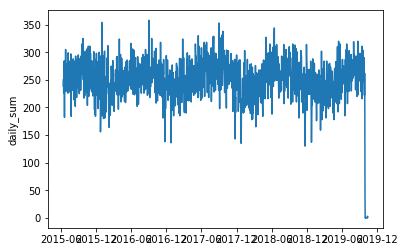

In [16]:
ts = df.index.value_counts()

daily_ts = ts.resample('D').sum().to_frame('daily_sum')

ax = sns.lineplot(x=daily_ts.index, y='daily_sum', data=daily_ts)

In [17]:
last_day_of_current_year = datetime(datetime.today().year, 12, 31, 0, 0, 0, 0)
last_day_in_data = daily_ts.index[-1]

difference = (last_day_of_current_year - last_day_in_data).days

In [18]:
daily_ts = daily_ts.reset_index()
daily_ts = daily_ts.rename(columns={'index': 'ds', 'daily_sum': 'y'})
daily_ts.head()

daily_model = Prophet()
daily_model.fit(daily_ts)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Jan\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



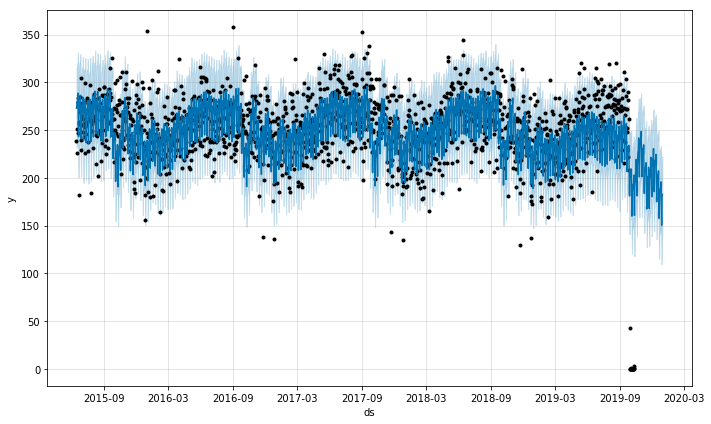

In [19]:
future_data = daily_model.make_future_dataframe(periods=difference, freq='D')
forecast_data = daily_model.predict(future_data)
ax = daily_model.plot(forecast_data)

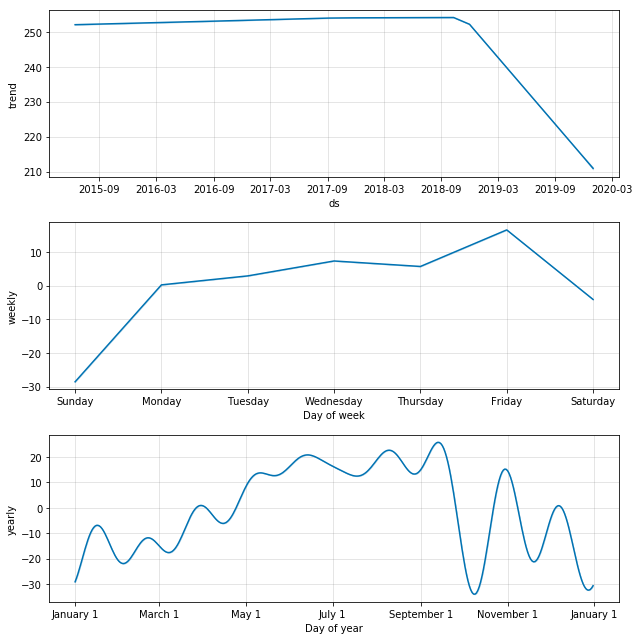

In [20]:
ax1 = daily_model.plot_components(forecast_data)

### Here is a monthly forecast

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Jan\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



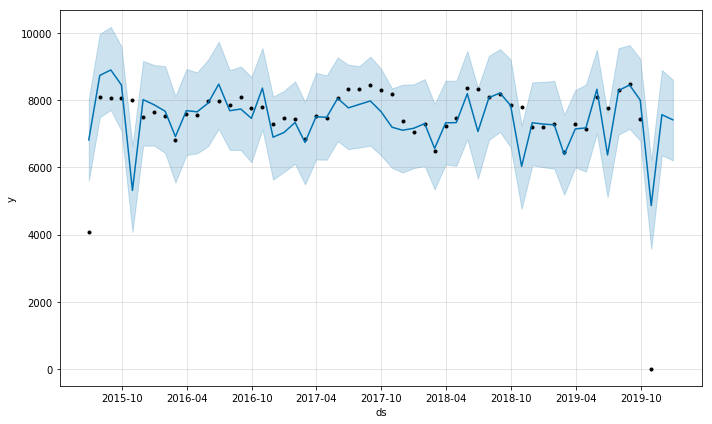

In [21]:
monthly_ts = ts.resample('M').sum().to_frame('monthly_sum')
last_month_in_data = monthly_ts.index[-1]
difference_months = round(((last_day_of_current_year - last_month_in_data).days)/30)
monthly_ts = monthly_ts.reset_index()
monthly_ts = monthly_ts.rename(columns={'index': 'ds', 'monthly_sum': 'y'})

monthly_model = Prophet()
monthly_model.fit(monthly_ts)

future_monthly_data = monthly_model.make_future_dataframe(periods=difference_months, freq='M')
forecast_monthly_data = monthly_model.predict(future_monthly_data)
ax2 = monthly_model.plot(forecast_monthly_data)

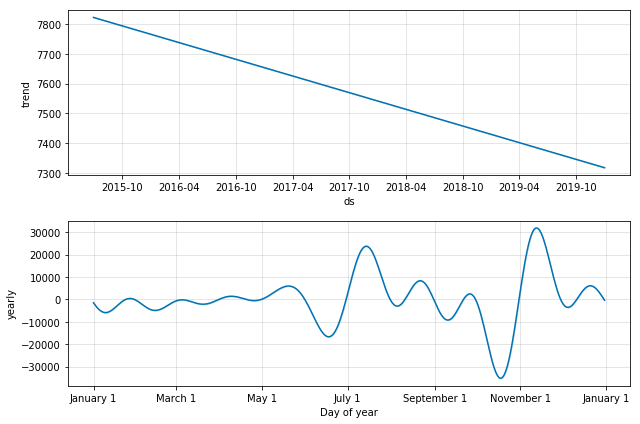

In [22]:
ax3 = monthly_model.plot_components(forecast_monthly_data)

## Future plans:
 * Explore LSTM models to improve the time-series forecast!
 
Go back to my [portfolio](https://github.com/JanAdamiak/data_science_portfolio)